<a href="https://colab.research.google.com/github/alwaystegar24/data-mining-tegar/blob/main/UAS_KLASIFIKASI_BUNGA_TEGAR_HIBATULLAH_FERNIKO_221011403393_05TPLE009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

nama = "Tegar Hibatullah Ferniko"
nim = "221011403393"
kelas = "05TPLE009"

print(f"Nama  : {nama}")
print(f"NIM   : {nim}")
print(f"Kelas : {kelas}")


Nama  : Tegar Hibatullah Ferniko
NIM   : 221011403393
Kelas : 05TPLE009


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
import os

# Lokasi file ZIP (ganti 'nama_file.zip' dengan nama file Anda)
# Get the current working directory instead of relying on __file__
current_dir = os.getcwd()
# Join the current directory with the filename to get the full path
zip_path = os.path.join(current_dir, "drive/MyDrive/Klasifikasi-bunga-dataset.zip")

# Ekstrak file ZIP ke folder tujuan
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")  # Folder tujuan ekstraksi
    print("Dataset berhasil diekstrak ke folder 'dataset'")

Dataset berhasil diekstrak ke folder 'dataset'


In [6]:
import shutil
from sklearn.model_selection import train_test_split

base_dir = '/content/dataset'
classes = os.listdir(base_dir)

# Membuat folder train dan validation
os.makedirs(base_dir + '/train', exist_ok=True)
os.makedirs(base_dir + '/validation', exist_ok=True)

# Memindahkan file ke folder train/validation
for cls in classes:
    if not os.path.isdir(base_dir + '/' + cls):
        continue

    files = os.listdir(base_dir + '/' + cls)
    train_files, val_files = train_test_split(files, test_size=0.2, random_state=42)

    os.makedirs(base_dir + '/train/' + cls, exist_ok=True)
    os.makedirs(base_dir + '/validation/' + cls, exist_ok=True)

    for file in train_files:
        shutil.move(base_dir + '/' + cls + '/' + file, base_dir + '/train/' + cls)
    for file in val_files:
        shutil.move(base_dir + '/' + cls + '/' + file, base_dir + '/validation/' + cls)


In [7]:
!pip install tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import the ImageDataGenerator class

train_dir = '/content/dataset/train'
val_dir = '/content/dataset/validation'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen =ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 181 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [4]:
from tensorflow.keras.models import Sequential # Import the Sequential class
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Import necessary layers
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Sesuaikan dengan jumlah kelas
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored

6/6 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 -

In [7]:
loss, accuracy = model.evaluate(val_generator)
print(f"Loss: {loss}, Accuracy: {accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Loss: 0.0, Accuracy: 1.0


In [6]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


dataset_dir = '/content/dataset/validation/KLASIFIKASI BUNGA/matahari'

files = os.listdir(dataset_dir)
print(files)
for file in files:
    if file.startswith("Matahari") and file.endswith(".jpg"):
        img_path = os.path.join(dataset_dir, file)
        break
    raise FileNotFoundError(f"No file starting with 'Matahari' and ending with '.jpg' found in {dataset_dir}")

img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 150, 150, 3)

prediction = model.predict(img_array)
print("Probabilitas prediksi:", prediction)
predicted_class = np.argmax(prediction)
print("Kelas yang diprediksi:", list(train_generator.class_indices.keys())[predicted_class])

['Matahari (41).jpg', 'Matahari (15).jpg', 'Matahari (32).jpg', 'Matahari (98).jpg', 'Matahari (6).jpg', 'Matahari (27).jpg', 'Matahari (77).jpg', 'Matahari (85).jpg', 'Matahari (66).jpg', 'Matahari (36).jpg', 'Matahari (8).jpg', 'Matahari (69).jpg', 'Matahari (55).jpg', 'Matahari (90).jpg', 'Matahari (88).jpg', 'Matahari (46).jpg', 'Matahari (7).jpg', 'Matahari (20).jpg', 'Matahari (82).jpg', 'Matahari (87).jpg', 'Matahari (10).jpg', 'Matahari (71).jpg', 'Matahari (34).jpg', 'Matahari (91).jpg', 'Matahari (68).jpg', 'Matahari (64).jpg', 'Matahari (70).jpg', 'Matahari (75).jpg', 'Matahari (53).jpg', 'Matahari (84).jpg', 'Matahari (57).jpg', 'Matahari (43).jpg', 'Matahari (17).jpg', 'Matahari (29).jpg', 'Matahari (5).jpg', 'Matahari (45).jpg', 'Matahari (60).jpg', 'Matahari (38).jpg', 'Matahari (39).jpg', 'Matahari (23).jpg', 'Matahari (22).jpg', 'Matahari (12).jpg', 'Matahari (96).jpg', 'Matahari (54).jpg', 'Matahari (4).jpg', 'Matahari (62).jpg', 'Matahari (72).jpg', 'Matahari (89).jp

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Saving download.webp to download.webp
Gambar yang diunggah: download.webp


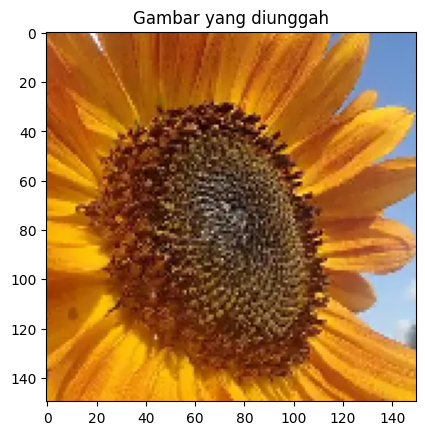

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Probabilitas prediksi: [[1.]]
Kelas yang diprediksi: KLASIFIKASI BUNGA


In [8]:
from google.colab import files
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Upload file
uploaded = files.upload()

# Ambil nama file yang diunggah
file_name = list(uploaded.keys())[0]

print(f"Gambar yang diunggah: {file_name}")

# Load gambar dan ubah ke format yang sesuai untuk model
img = load_img(file_name, target_size=(150, 150))  # Sesuaikan ukuran dengan input model
plt.imshow(img)  # Now plt is defined and can be used
plt.title("Gambar yang diunggah")
plt.show()

# Preprocessing
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediksi
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
classes = list(train_generator.class_indices.keys())

print(f"Probabilitas prediksi: {prediction}")
print(f"Kelas yang diprediksi: {classes[predicted_class]}")


In [9]:
model.save('/content/bunga_classifier.h5')


In [10]:
model.save('/content/sample_data/dataset_bunga_classifier.h5')
print("Model berhasil disimpan di folder sample_data.")


Model berhasil disimpan di folder sample_data.


In [11]:
import os

# List file di folder sample_data
files = os.listdir('/content/sample_data')
print("Daftar file di folder sample_data:")
print(files)


Daftar file di folder sample_data:
['anscombe.json', 'README.md', 'dataset_bunga_classifier.h5', 'california_housing_test.csv', 'california_housing_train.csv', 'mnist_train_small.csv', 'mnist_test.csv']
